# 22COP528 - AI &  Applied Machine Learning Coursework

## Author: B924007

## Task 02. Deep Learning for Image classification

## Install relevant packages

Note: If not already installed, please remove the '#' and run code below.

In [ ]:
#conda install tensorflow

In [32]:
!pip install tensorflow

In [33]:
!pip install keras

In [ ]:
#!pip install -U --pre tensorflow=="2.*" --user

In [34]:
!pip install tf_slim --user

## Import packages

In [35]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.utils import image_dataset_from_directory

## Data & Preliminary Analysis (10%)

## Read in image dataset

In [36]:
# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

batch_size = 32 #batch for each iteration
image_size = (128,128) #size of images

# Read image data from file directory
train_dir = 'imageset/imageset/train'
test_dir = 'imageset/imageset/val'

# Use 'image_dataset_from_directory' to read images
train_dataset = image_dataset_from_directory(train_dir, shuffle = True, batch_size = batch_size, image_size = image_size)
test_dataset = image_dataset_from_directory(test_dir, shuffle = True, batch_size = batch_size, image_size = image_size)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [23]:
# Normalize pixel size
#train_dataset, test_dataset = train_dataset / 255.0, test_dataset / 255.0

In [37]:
# see list of class names
class_names = train_dataset.class_names
print(class_names)

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


Random images from the Training Dataset:


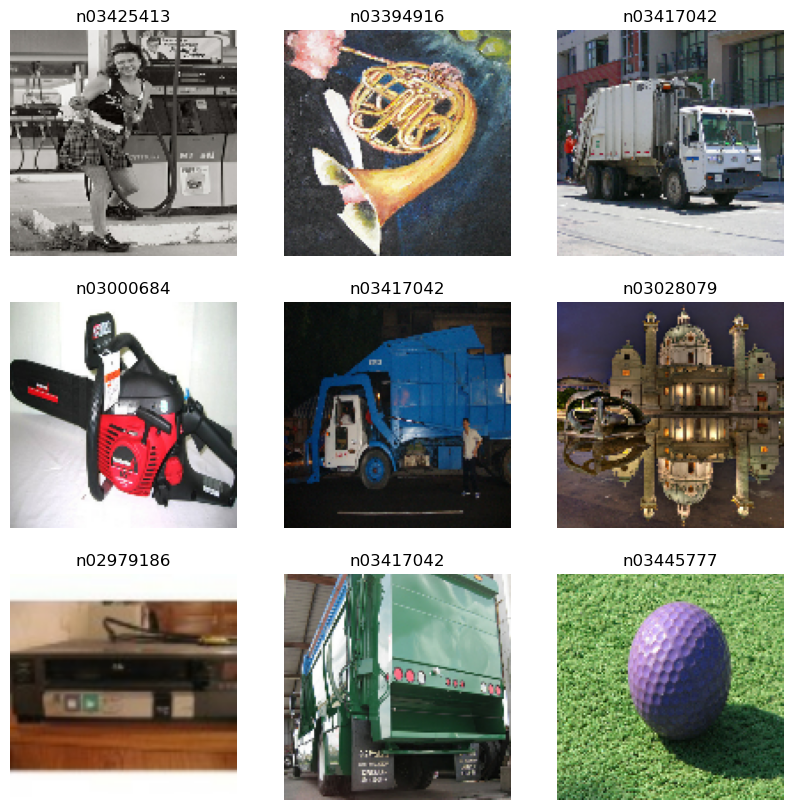

In [38]:
# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# plot a matrix of random images from the train dataset
print("Random images from the Training Dataset:")
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[(labels[i])])
        plt.axis('off')

Random images from the Testing/Validation Dataset:


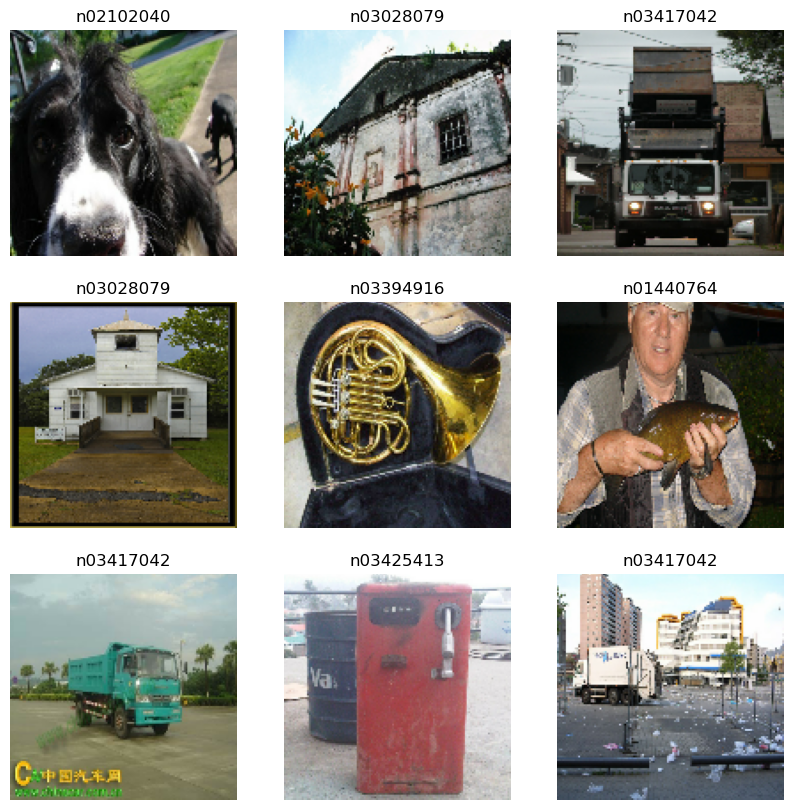

In [39]:
# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# plot a matrix of random images from the test dataset
print("Random images from the Testing/Validation Dataset:")
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[(labels[i])])
        plt.axis('off')

## Methods & Experiments (40%)

In [40]:
import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

## Decide on best optimizer

In [42]:
# Create empty dictionary
opt_perf = {}
for optim in ['adam', 'rmsprop', 'adadelta', 'sgd']:
    # create model
    test_model = models.Sequential()
    # conv layer 1
    test_model.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
    # max pool 1
    test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    # conv layer 2
    test_model.add(layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
    # max pool 2
    test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    # conv layer 3
    test_model.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
    # max pool 3
    test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    # flatten layer
    test_model.add(layers.Flatten())
    # dense layer
    test_model.add(layers.Dense(128, activation='relu'))
    # dropout layer 1
    test_model.add(layers.Dropout(0.4))
    # dense layer 2
    test_model.add(layers.Dense(10))
    
    # apply optimizer and loss function
    test_model.compile(optimizer = optim,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
    # apply model to train and test data
    opt_perf[optim] = test_model.fit(train_dataset, epochs=10, validation_data=(test_dataset))

Epoch 1/10
296/296 [==============================] - 98s 327ms/step - loss: 5.6738 - accuracy: 0.1942 - val_loss: 2.1323 - val_accuracy: 0.2168
Epoch 2/10
296/296 [==============================] - 94s 318ms/step - loss: 2.0745 - accuracy: 0.2676 - val_loss: 1.9944 - val_accuracy: 0.3108
Epoch 3/10
296/296 [==============================] - 95s 321ms/step - loss: 1.9522 - accuracy: 0.3281 - val_loss: 1.8762 - val_accuracy: 0.3597
Epoch 4/10
296/296 [==============================] - 94s 319ms/step - loss: 1.7232 - accuracy: 0.4151 - val_loss: 1.8864 - val_accuracy: 0.3562
Epoch 5/10
296/296 [==============================] - 97s 327ms/step - loss: 1.5292 - accuracy: 0.4875 - val_loss: 1.8883 - val_accuracy: 0.4010
Epoch 6/10
296/296 [==============================] - 98s 331ms/step - loss: 1.3444 - accuracy: 0.5404 - val_loss: 1.9856 - val_accuracy: 0.4132
Epoch 7/10
296/296 [==============================] - 95s 321ms/step - loss: 1.1252 - accuracy: 0.6158 - val_loss: 2.3056 - val_ac

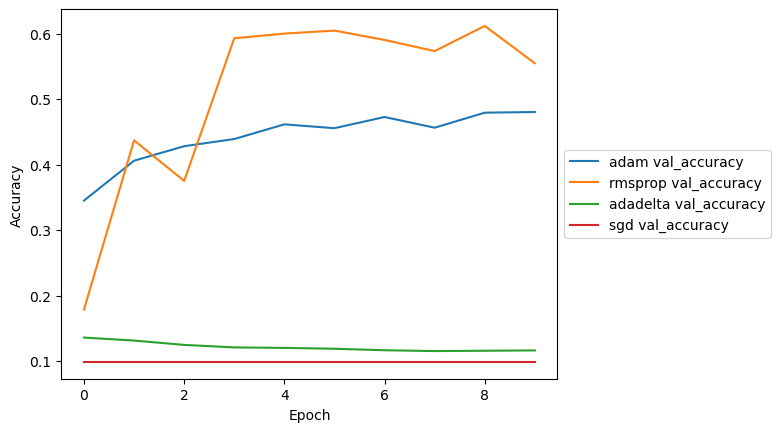

In [12]:
for optim in opt_perf:
    plt.plot(opt_perf[optim].history['val_accuracy'], label = f'{optim} val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Decide on the best activation function

In [26]:
activ_fctn = {}
for act_fnc in ['relu', 'linear', 'sigmoid', 'tanh']:
    activation_model = models.Sequential()
    activation_model.add(layers.Conv2D(32,(3,3), activation = act_fnc, padding = 'same'))
    activation_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    activation_model.add(layers.Conv2D(64,(3,3), activation = act_fnc, padding = 'same'))
    activation_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    activation_model.add(layers.Conv2D(128,(3,3), activation = act_fnc, padding = 'same'))
    activation_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
    activation_model.add(layers.Flatten())
    activation_model.add(layers.Dense(128, activation= act_fnc))
    activation_model.add(layers.Dropout(0.4))
    activation_model.add(layers.Dense(10))
    
    activation_model.compile(optimizer = 'rmsprop',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
    activ_fctn[act_fnc] = activation_model.fit(train_dataset, epochs=10, validation_data=(test_dataset))

Epoch 1/10
296/296 [==============================] - 91s 306ms/step - loss: 9.7934 - accuracy: 0.1186 - val_loss: 2.2991 - val_accuracy: 0.1134
Epoch 2/10
296/296 [==============================] - 92s 309ms/step - loss: 2.4690 - accuracy: 0.1058 - val_loss: 2.3020 - val_accuracy: 0.0922
Epoch 3/10
296/296 [==============================] - 91s 307ms/step - loss: 2.3416 - accuracy: 0.1066 - val_loss: 2.2870 - val_accuracy: 0.1172
Epoch 4/10
296/296 [==============================] - 89s 301ms/step - loss: 2.2796 - accuracy: 0.1446 - val_loss: 2.1280 - val_accuracy: 0.2611
Epoch 5/10
296/296 [==============================] - 90s 303ms/step - loss: 1.9493 - accuracy: 0.3304 - val_loss: 1.5942 - val_accuracy: 0.4843
Epoch 6/10
296/296 [==============================] - 90s 304ms/step - loss: 1.5666 - accuracy: 0.4863 - val_loss: 1.3278 - val_accuracy: 0.5814
Epoch 7/10
296/296 [==============================] - 90s 304ms/step - loss: 1.3405 - accuracy: 0.5718 - val_loss: 1.2809 - val_ac

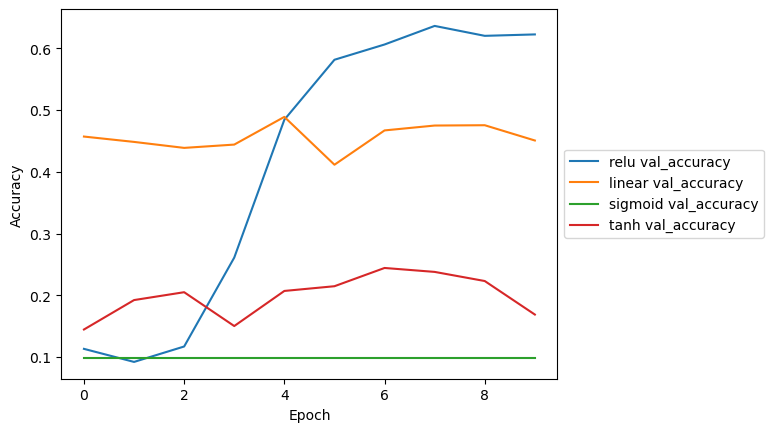

In [27]:
for act_fnc in activ_fctn:
    plt.plot(activ_fctn[act_fnc].history['val_accuracy'], label = f'{act_fnc} val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Create my best model

https://www.tensorflow.org/tutorials/images/cnn

## Optimizer = rmsprop

In [28]:
rmsprop_model = models.Sequential()
rmsprop_model.add(layers.Conv2D(16,(3,3), activation = 'linear', padding = 'same', input_shape = (128,128,3)))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(16,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.Dropout(0.2))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
rmsprop_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
rmsprop_model.add(layers.Flatten())
rmsprop_model.add(layers.Dense(128, activation='relu'))
rmsprop_model.add(layers.Dropout(0.2))
rmsprop_model.add(layers.Dense(10))

rmsprop_model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_rmsprop = rmsprop_model.fit(train_dataset, epochs=10, 
                    validation_data=(test_dataset))

Epoch 1/10
296/296 [==============================] - 42s 137ms/step - loss: 2.1653 - accuracy: 0.2168 - val_loss: 2.0301 - val_accuracy: 0.2810
Epoch 2/10
296/296 [==============================] - 40s 135ms/step - loss: 1.7768 - accuracy: 0.3951 - val_loss: 1.6067 - val_accuracy: 0.4540
Epoch 3/10
296/296 [==============================] - 40s 135ms/step - loss: 1.4986 - accuracy: 0.5080 - val_loss: 1.6973 - val_accuracy: 0.4120
Epoch 4/10
296/296 [==============================] - 40s 135ms/step - loss: 1.3460 - accuracy: 0.5715 - val_loss: 1.6105 - val_accuracy: 0.4634
Epoch 5/10
296/296 [==============================] - 40s 135ms/step - loss: 1.2038 - accuracy: 0.6145 - val_loss: 1.3241 - val_accuracy: 0.5804
Epoch 6/10
296/296 [==============================] - 40s 135ms/step - loss: 1.1057 - accuracy: 0.6494 - val_loss: 1.2416 - val_accuracy: 0.6138
Epoch 7/10
296/296 [==============================] - 40s 136ms/step - loss: 1.0524 - accuracy: 0.6717 - val_loss: 1.1585 - val_ac

In [18]:
rmsprop_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)      

1/1 - 0s - loss: 2.0260 - accuracy: 0.5000 - 44ms/epoch - 44ms/step


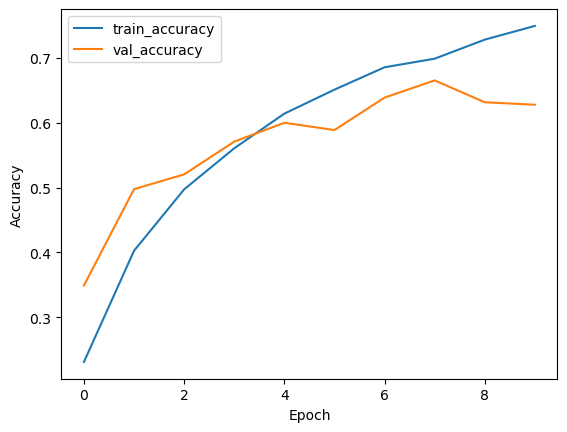

In [29]:
plt.plot(history_rmsprop.history['accuracy'], label='train_accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

test_loss, test_acc = test_model.evaluate(images, labels, verbose=2)

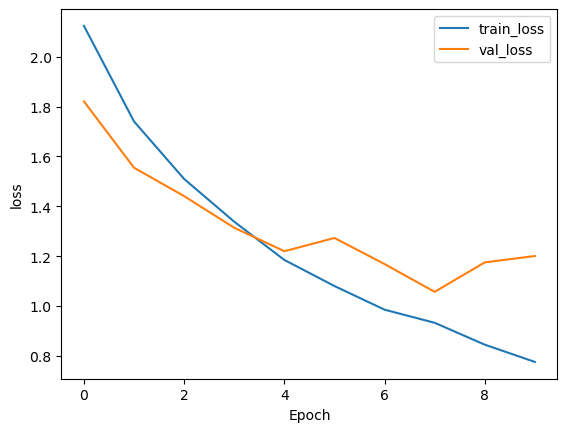

In [30]:
plt.plot(history_rmsprop.history['loss'], label='train_loss')
plt.plot(history_rmsprop.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')

## Optimizer = Adam

In [43]:
test_model = models.Sequential()
test_model.add(layers.Conv2D(16,(3,3), activation = 'linear', padding = 'same', input_shape = (128,128,3)))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(16,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.Dropout(0.2))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
test_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
test_model.add(layers.Flatten())
test_model.add(layers.Dense(128, activation='relu'))
test_model.add(layers.Dropout(0.2))
test_model.add(layers.Dense(10))

test_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_adam = test_model.fit(train_dataset, epochs=10, 
                    validation_data=(test_dataset))

Epoch 1/10
296/296 [==============================] - 43s 141ms/step - loss: 2.0436 - accuracy: 0.2766 - val_loss: 1.8164 - val_accuracy: 0.3654
Epoch 2/10
296/296 [==============================] - 41s 138ms/step - loss: 1.7118 - accuracy: 0.4176 - val_loss: 1.6634 - val_accuracy: 0.4410
Epoch 3/10
296/296 [==============================] - 41s 139ms/step - loss: 1.4827 - accuracy: 0.4948 - val_loss: 1.4290 - val_accuracy: 0.5225
Epoch 4/10
296/296 [==============================] - 42s 141ms/step - loss: 1.3116 - accuracy: 0.5573 - val_loss: 1.3022 - val_accuracy: 0.5710
Epoch 5/10
296/296 [==============================] - 44s 147ms/step - loss: 1.2016 - accuracy: 0.6024 - val_loss: 1.1956 - val_accuracy: 0.6127
Epoch 6/10
296/296 [==============================] - 44s 148ms/step - loss: 1.0907 - accuracy: 0.6460 - val_loss: 1.2305 - val_accuracy: 0.6099
Epoch 7/10
296/296 [==============================] - 45s 151ms/step - loss: 0.9763 - accuracy: 0.6890 - val_loss: 1.1649 - val_ac

In [44]:
test_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 16, 16, 32)     

1/1 - 0s - loss: 1.2606 - accuracy: 0.6562 - 42ms/epoch - 42ms/step


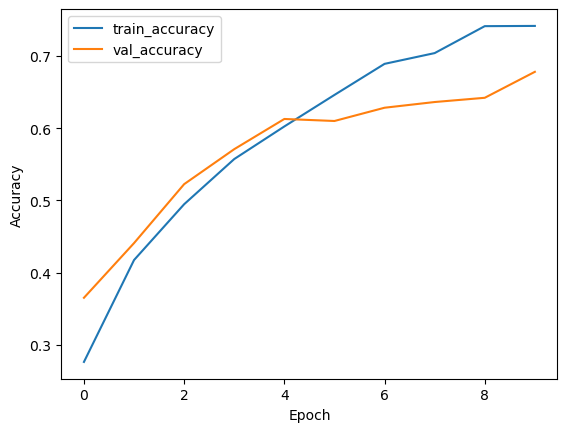

In [45]:
plt.plot(history_adam.history['accuracy'], label='train_accuracy')
plt.plot(history_adam.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

test_loss, test_acc = test_model.evaluate(images, labels, verbose=2)

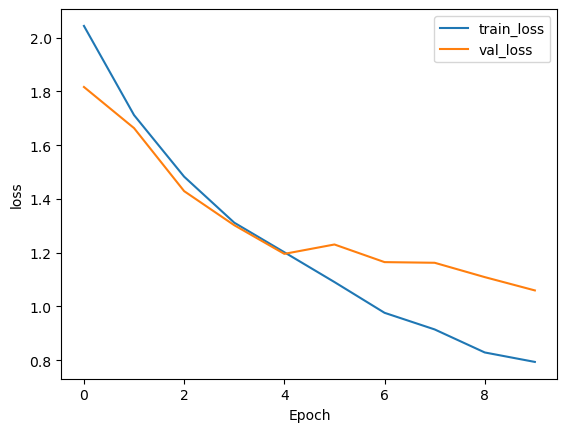

In [46]:
plt.plot(history_adam.history['loss'], label='train_loss')
plt.plot(history_adam.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')

## Develop a basic CNN Model

(Adapted from Hui Fang - 22COP528 - Lab 09)

In [34]:
# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# Define functions for a single layer basic CNN Model

class Basic_Model(Model):
    def __init__(self):
        super(Basic_Model, self).__init__()
        # Define the conv layer (32 filter, 3 kernel size)
        self.conv1 = Conv2D(32,3, activation = 'relu')
        # Define max pool layer
        self.pool1 = MaxPool2D()
        # Convert 2D image to 1D vector
        self.flatten = Flatten()
        # Define fully connected layer
        self.d1 = Dense(128, activation = 'relu')
        # Dense further to have output size 10
        self.d2 = Dense(10)
        
    def call(self, x):
        # call conv layer 1
        x = self.conv1(x)
        # call max pool 1
        x = self.pool1(x)
        # call flatten
        x = self.flatten(x)
        # call dense 128
        x = self.d1(x)
        # call dense 10
        return self.d2(x)

# Create model instance
BasicModel = Basic_Model()
# Define loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
# Define optimizer
optimizer = tf.keras.optimizers.Adam()

# Calculate train and test loss and accuracy
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

#########################################################################################

# Define a train function which takes images and labels as input into the CNN algorithm
# to predict the accuracy of the model based on the train dataset.

@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = BasicModel(images, training = True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, BasicModel.trainable_variables)
    optimizer.apply_gradients(zip(gradients, BasicModel.trainable_variables))
    train_loss(loss)
    train_accuracy(labels,predictions)

# Define a test function to evaluate the accuracy of the trained CNN model, on the test
# dataset

@tf.function
def test_step(images,labels):
    predictions = BasicModel(images, training = False)
    t_loss = loss_object(labels, predictions)
    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Run the CNN model, define number of EPOCHS, 5 is default:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset metrics after each epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    for images, labels in train_dataset:
        train_step(images, labels)
    for test_images, test_labels in test_dataset:
        test_step(test_images, test_labels)
    
    print(
    f'Epoch{epoch + 1},'
    f'Train Loss: {train_loss.result()},'
    f'Train Accuracy: {train_accuracy.result()*100},'
    f'Test Loss: {test_loss.result()},'
    f'Test Accuracy: {test_accuracy.result()*100}'
    )
    
    

Epoch1,Train Loss: 69.5379409790039,Train Accuracy: 18.396873474121094,Test Loss: 2.2112133502960205,Test Accuracy: 19.898090362548828
Epoch2,Train Loss: 1.841800570487976,Train Accuracy: 36.60365295410156,Test Loss: 2.145111560821533,Test Accuracy: 27.261146545410156
Epoch3,Train Loss: 1.351135015487671,Train Accuracy: 54.926605224609375,Test Loss: 2.1988325119018555,Test Accuracy: 29.656049728393555
Epoch4,Train Loss: 1.0119801759719849,Train Accuracy: 67.3038330078125,Test Loss: 2.2678234577178955,Test Accuracy: 29.78343963623047
Epoch5,Train Loss: 0.7844353914260864,Train Accuracy: 76.12207794189453,Test Loss: 2.4779889583587646,Test Accuracy: 30.24203872680664


## Data Augmentation

In [51]:
# Carrying out data augmentation
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data_gen = ImageDataGenerator(rotation_range = 30, # randomly rotate by 30 degrees
                             #width_shift_range = 0.1, # randomly shift by 10%
                             #height_shift_range = 0.1, # randomly shift by 10%
                             #zoom_range = 0.1, # randomly zoom by 10%
                             #horizontal_flip = True, # randomly flip image
                             #fill_mode = 'nearest' # fill empty pixels with nearest value
                             #)
# Apply augmentation code to dataset
#augmented_training_data = train_dataset.map(lambda x,y:(data_gen.flow(x,batch_size = batch_size, shuffle = False).next(),y)).unbatch()

# Merge to original dataset
#train_dataset_new = train_dataset.concatenate(augmented_training_data).shuffle(10000)

## Existing CNN algorithm applications - VGG16

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Define the dimensions of input images
img_width, img_height = 224, 224

# Define the paths to the training and testing datasets
train_data_dir = 'imageset/imageset/train'
test_data_dir = 'imageset/imageset/val'

# Define the number of samples in each category of training set
nb_train_samples = 9469
nb_test_samples = 3925

# Set the number of epochs and batch size for training
epochs = 5
batch_size = 32

# Preprocess input images by rescaling pixel values
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the VGG16 model, pre-trained on ImageNet dataset
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the weights of the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding layers on top of the pre-trained layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Generate training and validation batches from the preprocessed images
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = train_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

# Train the model on the training data and validate on the testing data
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=nb_test_samples // batch_size)

# Save the trained model for future use
#model.save('vgg16_model')


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


C:\Users\MP\AppData\Local\Temp\ipykernel_1860\3316811296.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/5
295/295 [==============================] - 840s 3s/step - loss: 0.9892 - accuracy: 0.6964 - val_loss: 0.4772 - val_accuracy: 0.8566
Epoch 2/5
295/295 [==============================] - 849s 3s/step - loss: 0.5408 - accuracy: 0.8240 - val_loss: 0.3942 - val_accuracy: 0.8763
Epoch 3/5
295/295 [==============================] - 866s 3s/step - loss: 0.4417 - accuracy: 0.8503 - val_loss: 0.3733 - val_accuracy: 0.8796
Epoch 4/5
295/295 [==============================] - 856s 3s/step - loss: 0.3678 - accuracy: 0.8760 - val_loss: 0.3727 - val_accuracy: 0.8811
Epoch 5/5
295/295 [==============================] - 851s 3s/step - loss: 0.3479 - accuracy: 0.8810 - val_loss: 0.3785 - val_accuracy: 0.8860


## ResNet50

In [37]:
#from keras.applications import ResNet50
#from keras.layers import Dense, Flatten
#from keras.models import Model

# Load ResNet50
#model = ResNet50(weights = 'imagenet', input_shape = (224,224,3), include_top = False)
# Add a custom output layer
#x = model.output
#x = Flatten()(x)
#x = Dense(256, activation='relu')(x)
#predictions = Dense(10, activation='softmax')(x)
# Define the new model
#model = Model(inputs=model.input, outputs=predictions)

# Freeze the pre-trained layers
#for layer in model.layers:
    #layer.trainable = False

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)